# Load MNIST Data 

In [4]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d0 = pd.read_csv('mnist-train.csv')

#d0 = d0.loc[:, (d0!=0).any(axis=0)]

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


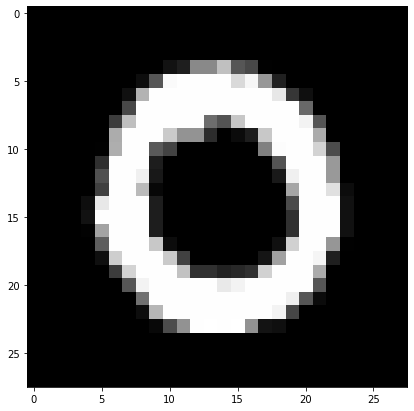

0


In [6]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

#  2D Visualization using PCA 

In [63]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [64]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [74]:
cov_mat = np.cov(standardized_data.T)
print(cov_mat.shape)

values, vectors = eigh(cov_matrix, eigvals=(779,783)) 

vectors = vectors.T

print("Shape of eigen vectors = ",vectors.shape) 

print(values.shape, vectors.shape)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape)

sample_data_pc= np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", sample_data_pc.shape)

(784, 784)
Shape of eigen vectors =  (5, 784)
(5,) (5, 784)
 resultanat new data points' shape  (5, 784) X (784, 15000)
 resultanat new data points' shape  (5, 784) X (784, 15000)  =  (5, 15000)


In [71]:
values

array([270966.54775447, 315240.11502971, 406652.17579533, 435532.55785282,
       605719.29173629])

from scipy.linalg import eigh

sample_data=standardized_data
cov_matrix = np.matmul(sample_data.T, sample_data)

values, vectors = eigh(cov_matrix, eigvals=(1,2))
vectors = vectors.T

print("Shape of eigen vectors = ",vectors.shape)
print(values.shape, vectors.shape)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape)

sample_data_pc= np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", sample_data_pc.shape)

In [58]:
# find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [59]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen values = ", values.shape)
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen values =  (2,)
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [34]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [110]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


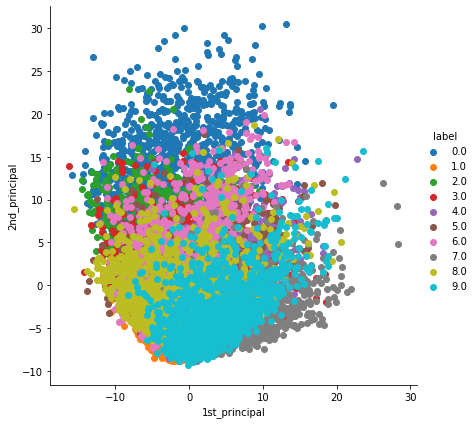

In [111]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [38]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [39]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


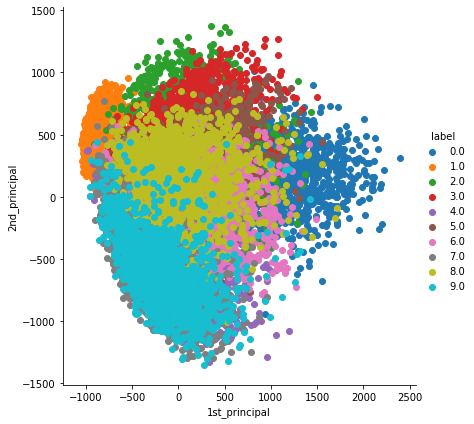

In [40]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

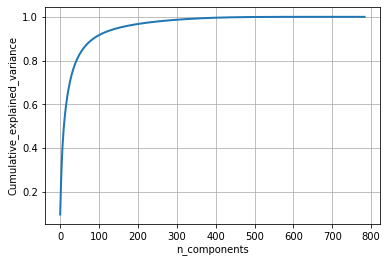

In [41]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

#### Modeling Uing Principal Components

In [42]:
y = l.head(15000)
X = d.head(15000)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("the shape of sample data = ", X.shape, X_train.shape, X_test.shape)

the shape of sample data =  (15000, 784) (10050, 784) (4950, 784)


In [43]:
##Model Perforamnce before PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)

print(accuracy_score(y_test, y_test_pred))
print('\n',confusion_matrix(y_test, y_test_pred))

0.9101010101010101

 [[462   0   0   1   1   2   5   0   3   0]
 [  1 564   6   0   4   0   0   1   2   1]
 [  7   4 451   5   8   0   2   3   7   1]
 [  4   2  22 439   0  13   0   3  13   2]
 [  1   2   3   0 437   2   3   5   2  17]
 [  8   7   2  28   3 370   3   0  10   0]
 [  9   0   4   1   4  10 461   0   1   0]
 [  2   4  13   4  12   1   0 490   3  11]
 [  3   8   4  18   6  16   5   4 399   9]
 [  2   5   2   7  29   7   0  12  10 432]]


In [44]:
# initializing the pca
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# pca_reduced will contain the 2-d projects of simple data
print("the shape of sample data = ", X_train_pca.shape, X_test_pca.shape)

the shape of sample data =  (10050, 784) (4950, 784)


In [45]:
X_train_pca = pd.DataFrame(data=X_train_pca, columns=['PC_' + str(i) for i in range(1, 785)])
X_test_pca = pd.DataFrame(data=X_test_pca, columns=['PC_' + str(i) for i in range(1, 785)])

In [46]:
X_test_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_775,PC_776,PC_777,PC_778,PC_779,PC_780,PC_781,PC_782,PC_783,PC_784
0,-342.604433,314.121904,290.544130,-184.319467,-445.016616,584.702612,433.330485,-56.206390,532.137736,313.685783,...,0.0,0.0,0.0,0.0,-2.133281e-14,1.339096e-13,-1.089496e-14,-1.773844e-14,7.743981e-14,-1.122117e-13
1,-871.431531,-87.491843,54.449703,-695.440699,-17.256322,-400.245075,520.263333,-56.104196,306.149884,-51.767363,...,0.0,0.0,0.0,0.0,-9.339978e-15,9.106158e-14,2.154498e-15,-1.544164e-13,4.635313e-14,-8.726481e-14
2,-519.651728,-442.245565,174.045992,-135.291755,103.856648,-66.042491,-177.669363,307.934395,103.608601,-374.801386,...,0.0,0.0,0.0,0.0,3.879774e-15,-1.162925e-13,2.868712e-13,3.597794e-15,-9.680753e-14,3.938431e-14
3,842.843141,27.897226,930.563635,-850.522772,-325.612228,-67.191874,-275.977831,416.157308,732.229055,-311.576124,...,0.0,0.0,0.0,0.0,6.624803e-16,3.756480e-13,2.034631e-13,5.843847e-14,-2.267401e-13,6.614074e-14
4,103.675306,-361.875222,8.322227,-0.364735,-408.912980,527.023351,562.125209,272.563181,-786.414895,4.149081,...,0.0,0.0,0.0,0.0,6.916398e-16,-1.787598e-13,2.815040e-13,-5.135694e-14,-4.116916e-15,3.759104e-14


In [ ]:
acc = []

for i in range(1, 20):
    
    rf = RandomForestClassifier(n_estimators=10)

    rf.fit(X_train_pca.iloc[:,:i], y_train)
    y_test_pred = rf.predict(X_test_pca.iloc[:,:i])
    y_test_prob = rf.predict_proba(X_test_pca.iloc[:,:i])
    acc.append(accuracy_score(y_test, y_test_pred))
    
    print(X_test_pca.iloc[:,:i].info())
    print(accuracy_score(y_test, y_test_pred))
    print('\n',confusion_matrix(y_test, y_test_pred))
    
plt.plot(range(1,20), acc)
plt.show()

In [50]:
# save the labels into a variable l.
y = d0['label'].head(15000)

# Drop the label feature and store the pixel data in d.
X = d0.drop("label",axis=1).head(15000)

# configuring the parameteres

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pca = PCA()
X_pc = pca.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", X_pc.shape)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_pc, y)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

shape of pca_reduced.shape =  (15000, 784)
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.3min finished


We can get accuracy of 0.7338 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [ ]:
# save the labels into a variable l.
y = d0['label'].head(15000)

# Drop the label feature and store the pixel data in d.
X = d0.drop("label",axis=1).head(15000)

# configuring the parameteres



from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pca = PCA()
X_pc = pca.fit_transform(X)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_pc, y).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,150)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)